Load & Inspect Dataset

In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("car data.csv")

# Check first 5 rows
print(df.head())

# Check info
print(df.info())

# Check for missing values
print(df.isnull().sum())


  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  3

Explore Dataset

In [2]:
print(df.columns)

# Summary statistics
print(df.describe())

# Unique values in categorical columns
for col in df.select_dtypes(include="object").columns:
    print(f"{col}: {df[col].unique()}")


Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')
              Year  Selling_Price  Present_Price     Driven_kms       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.642584   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000
Car_Name: ['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 

Data Preprocessing

In [3]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.select_dtypes(include="object").columns:
    df[col] = le.fit_transform(df[col])

print(df.head())


   Car_Name  Year  Selling_Price  Present_Price  Driven_kms  Fuel_Type  \
0        90  2014           3.35           5.59       27000          2   
1        93  2013           4.75           9.54       43000          1   
2        68  2017           7.25           9.85        6900          2   
3        96  2011           2.85           4.15        5200          2   
4        92  2014           4.60           6.87       42450          1   

   Selling_type  Transmission  Owner  
0             0             1      0  
1             0             1      0  
2             0             1      0  
3             0             1      0  
4             0             1      0  


Define Features (X) & Target (y)

In [4]:
X = df.drop("Selling_Price", axis=1)  # Features
y = df["Selling_Price"]               # Target


Train-Test Split

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Train Multiple Models

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(name, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"📊 {name} Results")
    print("MAE:", mae)
    print("MSE:", mse)
    print("R² Score:", r2)
    print("-"*40)
    return {"Model": name, "MAE": mae, "MSE": mse, "R²": r2}

results = []
results.append(evaluate_model("Linear Regression", LinearRegression()))
results.append(evaluate_model("Decision Tree", DecisionTreeRegressor(random_state=42)))
results.append(evaluate_model("Random Forest", RandomForestRegressor(n_estimators=100, random_state=42)))
results.append(evaluate_model("SVR", SVR(kernel="rbf")))


📊 Linear Regression Results
MAE: 1.2147329896540084
MSE: 3.537020423742584
R² Score: 0.8464540623821766
----------------------------------------
📊 Decision Tree Results
MAE: 0.6267213114754098
MSE: 1.019270491803279
R² Score: 0.9557523495483484
----------------------------------------
📊 Random Forest Results
MAE: 0.589304918032787
MSE: 0.782636952131147
R² Score: 0.9660248711535068
----------------------------------------
📊 SVR Results
MAE: 3.1545259939567907
MSE: 25.229175540891884
R² Score: -0.09522619313911806
----------------------------------------


Compare Results

               Model       MAE        MSE        R²
0  Linear Regression  1.214733   3.537020  0.846454
1      Decision Tree  0.626721   1.019270  0.955752
2      Random Forest  0.589305   0.782637  0.966025
3                SVR  3.154526  25.229176 -0.095226


/tmp/ipython-input-2428454801.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="R²", data=results_df, palette="viridis")


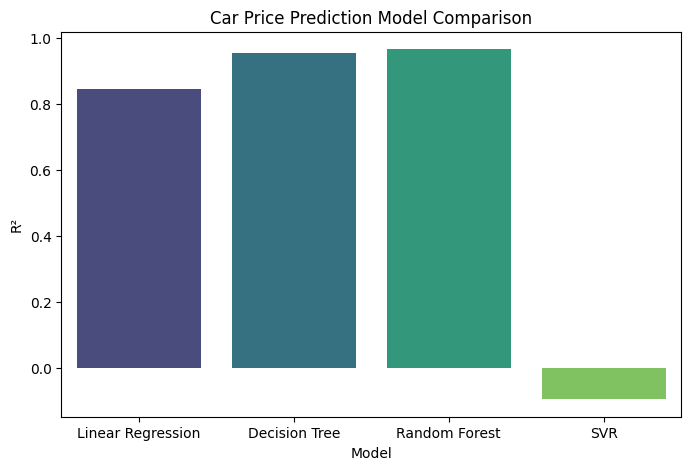

In [7]:
results_df = pd.DataFrame(results)
print(results_df)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="R²", data=results_df, palette="viridis")
plt.title("Car Price Prediction Model Comparison")
plt.show()


Save Best Model


In [8]:
import joblib

best_model = RandomForestRegressor(n_estimators=100, random_state=42)
best_model.fit(X_train, y_train)

# Save model
joblib.dump(best_model, "car_price_model.pkl")

print("✅ Model saved as car_price_model.pkl")


✅ Model saved as car_price_model.pkl
